## Packges and configurations ##

In [1]:
# Padrão
import pandas as pd 
import numpy as np 

# Light GBM
import lightgbm as lgb

# Visualization
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import plotly
import seaborn as sns
sns.set_style('darkgrid')

# Others
import openpyxl
import xlrd
import os
import statistics
from math import isnan

# Metrics from Sklearn
from sklearn import set_config
from sklearn import metrics
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             precision_score, 
                             recall_score, 
                             confusion_matrix, 
                             auc,
                             roc_curve, 
                             roc_auc_score, 
                             f1_score, 
                             auc)
from sklearn.pipeline import make_pipeline

# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import StratifiedKFold

# Preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
import category_encoders as ce

# LOFO
from lofo import LOFOImportance, Dataset, plot_importance


c:\Users\luand\Documents\PRJ_OTIM_PRICING\Lib\site-packages\lofo\lofo_importance.py:3: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [2]:
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning) 
warnings.filterwarnings("ignore", category = FutureWarning) 
warnings.filterwarnings("ignore", category = UserWarning) 

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
path_in = '~\\Documents\\PRJ_OTIM_PRICING\\data\\processed\\'
#path_out = '~\\Documents\\PRJ_OTIM_PRICING\\data\\processed\\'

## Import dataframe ##

In [5]:
name_file_df = 'dataframe_processed_03.csv'
file_in = os.path.join(path_in, name_file_df)
df_conversion = pd.read_csv(file_in, sep=",", encoding='UTF-8', low_memory=False)
df_conversion.shape

(504550, 36)

## EDA Dataframe ##

In [6]:
df_conversion.isnull().sum().sum()

0

In [7]:
df_conversion.describe().T

,count,mean,std,min,25%,50%,75%,max
id,504550.000,287360.729,167315.913,39.000,143798.500,284178.000,431238.750,579808.000
Faixa_Hora_Contrat,504550.000,5.746,0.751,1.000,6.000,6.000,6.000,7.000
Faixa_Remun_Dezem_(SM),504550.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Escolaridade_após_2005,504550.000,6.744,1.637,1.000,6.000,7.000,7.000,11.000
Qtd_Hora_Contr,504550.000,41.526,7.279,0.000,44.000,44.000,44.000,44.000
Idade,504550.000,36.332,11.210,15.000,27.000,35.000,43.000,99.000
Qtd_Dias_Afastamento,504550.000,4.579,20.752,0.000,0.000,0.000,0.000,365.000
Raça_Cor,504550.000,3.849,1.609,1.000,2.000,5.000,5.000,7.000
Sexo_Trabalhador,504550.000,1.384,0.486,1.000,1.000,1.000,2.000,2.000
Tamanho_Estabelecimento,504550.000,5.104,2.604,1.000,3.000,5.000,7.000,10.000


In [8]:
def unique_values(df):
    all_cols = df.columns
    feature_name = []
    num_unique_val = []
    name_unique_val = []
    datatype = []
    
    for col in all_cols:
        feature_name.append(col)
        num_unique_val.append(df[col].nunique())
        name_unique_val.append(df[col].unique())
        datatype.append(df[col].dtype)
    return pd.DataFrame({'Feature Name': feature_name, 'Number of Unique Value': num_unique_val, 'Name of Unique Values': name_unique_val,'datatype': datatype})

In [9]:
unique_values(df_conversion)

,Feature Name,Number of Unique Value,Name of Unique Values,datatype
0,id,504550,"[39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 5...",int64
1,Faixa_Hora_Contrat,7,"[6, 5, 4, 3, 1, 7, 2]",int64
2,Faixa_Remun_Dezem_(SM),1,[0],int64
3,Escolaridade_após_2005,11,"[7, 9, 8, 5, 6, 10, 11, 4, 2, 3, 1]",int64
4,Qtd_Hora_Contr,45,"[44.0, 36.0, 40.0, 30.0, 24.0, 16.0, 42.0, 41....",float64
5,Idade,79,"[18.0, 31.0, 32.0, 36.0, 47.0, 52.0, 24.0, 26....",float64
6,Ind_Simples,2,"[False, True]",bool
7,Ind_Portador_Defic,2,"[False, True]",bool
8,Qtd_Dias_Afastamento,338,"[0.0, 74.0, 113.0, 5.0, 1.0, 14.0, 41.0, 13.0,...",float64
9,Raça_Cor,7,"[5, 2, 6, 7, 3, 4, 1]",int64


In [10]:
df_conversion.shape

(504550, 36)

In [11]:
interger_teste = ['is_cotacao', 'is_apolice', 'is_sinistro']   
for  Names in interger_teste:  
    print(df_conversion[Names].value_counts())

is_cotacao
1.000    252291
0.000    252259
Name: count, dtype: int64
is_apolice
0.000    450262
1.000     54288
Name: count, dtype: int64
is_sinistro
0.000    496974
1.000      7576
Name: count, dtype: int64


## Preparing Data ##

In [12]:
df_conversion['Tipo_Vínculo'] = df_conversion['Tipo_Vínculo'].astype(str)
df_conversion['Tipo_Vínculo'] = 'Tipo_Vínculo_' + df_conversion['Tipo_Vínculo']
df_conversion['Tipo_Vínculo'].head()

0    Tipo_Vínculo_10
1    Tipo_Vínculo_10
2    Tipo_Vínculo_10
3    Tipo_Vínculo_10
4    Tipo_Vínculo_10
Name: Tipo_Vínculo, dtype: object

In [13]:
df_conversion['IBGE_Subsetor'].value_counts()

IBGE_Subsetor
IBGE_Subsetor_16    129675
IBGE_Subsetor_19    111236
IBGE_Subsetor_21     73864
IBGE_Subsetor_15     46497
IBGE_Subsetor_20     38601
IBGE_Subsetor_22     37778
IBGE_Subsetor_25     20096
IBGE_Subsetor_23     18875
IBGE_Subsetor_13     10087
IBGE_Subsetor_17      4766
IBGE_Subsetor_7       4479
IBGE_Subsetor_11      4307
IBGE_Subsetor_18      4289
Name: count, dtype: int64

In [14]:
# bool columns:
a = unique_values(df_conversion)
a = a[(a['datatype'] == 'bool')]
bool_columns = a['Feature Name'].tolist()
bool_columns

['Ind_Simples',
 'Ind_Portador_Defic',
 'Ind_Trab_Intermitente',
 'Ind_Trab_Parcial']

In [15]:
# Convert bool into interger
def binary_map(feature):
    return feature.map({True:1, False:0})

for  Names in bool_columns:  
    df_conversion[Names] = df_conversion[[Names]].apply(binary_map)

In [16]:
df_conversion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504550 entries, 0 to 504549
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       504550 non-null  int64  
 1   Faixa_Hora_Contrat       504550 non-null  int64  
 2   Faixa_Remun_Dezem_(SM)   504550 non-null  int64  
 3   Escolaridade_após_2005   504550 non-null  int64  
 4   Qtd_Hora_Contr           504550 non-null  float64
 5   Idade                    504550 non-null  float64
 6   Ind_Simples              504550 non-null  int64  
 7   Ind_Portador_Defic       504550 non-null  int64  
 8   Qtd_Dias_Afastamento     504550 non-null  float64
 9   Raça_Cor                 504550 non-null  int64  
 10  corretora                504550 non-null  object 
 11  Sexo_Trabalhador         504550 non-null  int64  
 12  Tamanho_Estabelecimento  504550 non-null  int64  
 13  Tipo_Admissão            504550 non-null  int64  
 14  Tipo

In [17]:
interger_teste = ['is_cotacao', 'is_apolice', 'is_sinistro']   
for  Names in interger_teste:  
    print(df_conversion[Names].value_counts())

is_cotacao
1.000    252291
0.000    252259
Name: count, dtype: int64
is_apolice
0.000    450262
1.000     54288
Name: count, dtype: int64
is_sinistro
0.000    496974
1.000      7576
Name: count, dtype: int64


In [18]:
df_conversion = df_conversion[(df_conversion['is_cotacao'] == 1)].reset_index(drop = True)
df_conversion.shape

(252291, 36)

In [19]:
interger_teste = ['is_cotacao', 'is_apolice', 'is_sinistro']   
for  Names in interger_teste:  
    print(df_conversion[Names].value_counts())

is_cotacao
1.000    252291
Name: count, dtype: int64
is_apolice
0.000    198003
1.000     54288
Name: count, dtype: int64
is_sinistro
0.000    244715
1.000      7576
Name: count, dtype: int64


In [20]:
# categorical columns without an order :

a = unique_values(df_conversion)
a = a[(a['datatype'] == 'object')]
nominal_columns = a['Feature Name'].tolist()
nominal_columns

['corretora', 'Tipo_Vínculo', 'IBGE_Subsetor', 'Empresa_contrante', 'cidades']

In [21]:
for Names in nominal_columns: 
    print(Names, len(df_conversion[Names].unique()))

corretora 75
Tipo_Vínculo 18
IBGE_Subsetor 13
Empresa_contrante 547
cidades 952


In [22]:
nominal_columns_new = nominal_columns.copy()
for i in range(0, len(nominal_columns_new)):
    nominal_columns_new[i] = nominal_columns_new[i] + "_targetencoder_"

nominal_columns_new    

['corretora_targetencoder_',
 'Tipo_Vínculo_targetencoder_',
 'IBGE_Subsetor_targetencoder_',
 'Empresa_contrante_targetencoder_',
 'cidades_targetencoder_']

In [23]:
df_conversion.head()

,id,Faixa_Hora_Contrat,Faixa_Remun_Dezem_(SM),Escolaridade_após_2005,Qtd_Hora_Contr,Idade,Ind_Simples,Ind_Portador_Defic,Qtd_Dias_Afastamento,Raça_Cor,corretora,Sexo_Trabalhador,Tamanho_Estabelecimento,Tipo_Admissão,Tipo_Defic,Tipo_Vínculo,IBGE_Subsetor,Ind_Trab_Intermitente,Ind_Trab_Parcial,premio_input,Tempo_Emprego,Importancia_Segurada,is_cotacao,is_apolice,is_sinistro,Vlr_Sinistro,Comission,Empresa_contrante,cidades,premio_comercial,vlr_comission,premio_puro,DA,Lucro,Faixa_Etária,Taxa
0,41,6,0,7,44.000,32.000,0,0,0.000,6,corretora_5611201,2,4,1,1,Tipo_Vínculo_10,IBGE_Subsetor_21,0,0,4063.480,21.000,13163.210,1.000,0.000,0.000,0.000,0.250,EC_101,mg_belohorizonte,3763.600,940.900,1693.620,0.200,0.100,5,0.309
1,42,6,0,7,44.000,36.000,1,0,0.000,5,corretora_5611203,1,1,1,1,Tipo_Vínculo_10,IBGE_Subsetor_21,0,0,1425.290,7.800,6154.090,1.000,0.000,0.000,0.000,0.250,EC_101,es_vilavelha,1320.100,330.030,594.050,0.200,0.100,5,0.232
2,43,6,0,8,44.000,36.000,0,0,74.000,5,corretora_5611201,2,4,1,1,Tipo_Vínculo_10,IBGE_Subsetor_21,0,0,2065.470,19.200,6690.870,1.000,0.000,0.000,0.000,0.250,EC_101,mg_contagem,1913.040,478.260,860.870,0.200,0.100,5,0.309
3,44,6,0,9,44.000,31.000,1,0,0.000,5,corretora_4771701,2,2,1,1,Tipo_Vínculo_10,IBGE_Subsetor_16,0,0,8232.010,17.500,35544.070,1.000,0.000,0.000,0.000,0.250,EC_101,mg_conselheirolafaiete,7624.480,1906.120,3431.020,0.200,0.100,5,0.232
4,51,6,0,5,44.000,62.000,1,0,0.000,2,corretora_8211300,1,1,1,1,Tipo_Vínculo_10,IBGE_Subsetor_19,0,0,3330.620,62.500,14380.930,1.000,0.000,0.000,0.000,0.250,EC_101,es_cachoeirodeitapemirim,3084.820,771.210,1388.170,0.200,0.100,7,0.232


In [24]:
df_conversion.columns

Index(['id', 'Faixa_Hora_Contrat', 'Faixa_Remun_Dezem_(SM)',
       'Escolaridade_após_2005', 'Qtd_Hora_Contr', 'Idade', 'Ind_Simples',
       'Ind_Portador_Defic', 'Qtd_Dias_Afastamento', 'Raça_Cor', 'corretora',
       'Sexo_Trabalhador', 'Tamanho_Estabelecimento', 'Tipo_Admissão',
       'Tipo_Defic', 'Tipo_Vínculo', 'IBGE_Subsetor', 'Ind_Trab_Intermitente',
       'Ind_Trab_Parcial', 'premio_input', 'Tempo_Emprego',
       'Importancia_Segurada', 'is_cotacao', 'is_apolice', 'is_sinistro',
       'Vlr_Sinistro', 'Comission', 'Empresa_contrante', 'cidades',
       'premio_comercial', 'vlr_comission', 'premio_puro', 'DA', 'Lucro',
       'Faixa_Etária', 'Taxa'],
      dtype='object')

In [25]:
smoothing_1 = 2550.0
smoothing_2 = 1550.0
min_samples_leaf = 10
enc_auto1 = ce.TargetEncoder(smoothing=smoothing_1, min_samples_leaf=min_samples_leaf, handle_unknown='return_nan', return_df=True)
enc_auto2 = ce.TargetEncoder(smoothing=smoothing_2, min_samples_leaf=min_samples_leaf, handle_unknown='return_nan', return_df=True)

for Names, Names_New in zip(nominal_columns, nominal_columns_new): 
    if Names == 'corretora':
        df_conversion[Names_New] = enc_auto1.fit_transform(df_conversion[Names], df_conversion['premio_comercial'])
    elif Names == 'IBGE_Subsetor':  
        df_conversion[Names_New] = enc_auto1.fit_transform(df_conversion[Names], df_conversion['premio_input'])  
    else:    
        df_conversion[Names_New] = enc_auto2.fit_transform(df_conversion[Names], df_conversion['Tempo_Emprego'])

In [26]:
df_conversion[nominal_columns_new].head()

,corretora_targetencoder_,Tipo_Vínculo_targetencoder_,IBGE_Subsetor_targetencoder_,Empresa_contrante_targetencoder_,cidades_targetencoder_
0,2817.537,31.421,2402.242,27.612,26.942
1,2006.958,31.421,2402.242,27.612,28.126
2,2817.537,31.421,2402.242,27.612,26.247
3,2704.547,31.421,1806.782,27.612,31.606
4,3196.473,31.421,2443.587,27.612,34.556


In [27]:
df_conversion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252291 entries, 0 to 252290
Data columns (total 41 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   id                                252291 non-null  int64  
 1   Faixa_Hora_Contrat                252291 non-null  int64  
 2   Faixa_Remun_Dezem_(SM)            252291 non-null  int64  
 3   Escolaridade_após_2005            252291 non-null  int64  
 4   Qtd_Hora_Contr                    252291 non-null  float64
 5   Idade                             252291 non-null  float64
 6   Ind_Simples                       252291 non-null  int64  
 7   Ind_Portador_Defic                252291 non-null  int64  
 8   Qtd_Dias_Afastamento              252291 non-null  float64
 9   Raça_Cor                          252291 non-null  int64  
 10  corretora                         252291 non-null  object 
 11  Sexo_Trabalhador                  252291 non-null  i

## Distribuition of data ##

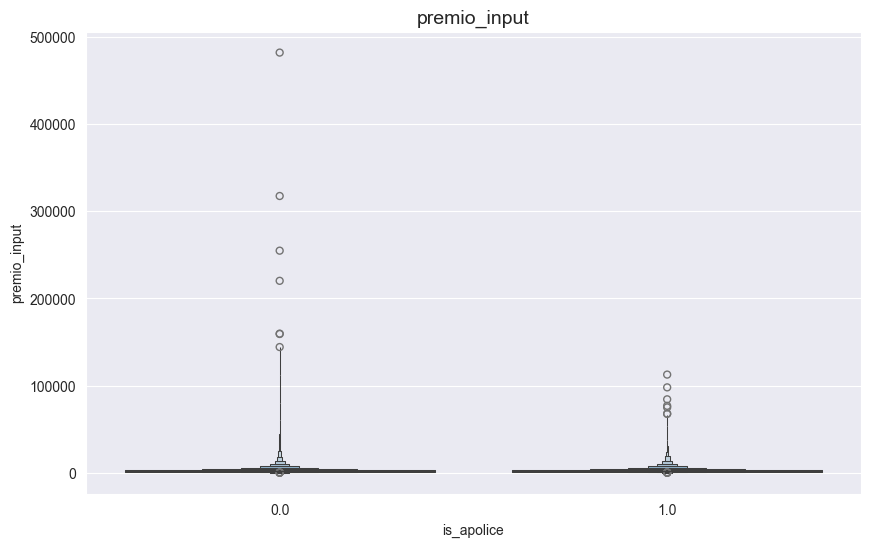

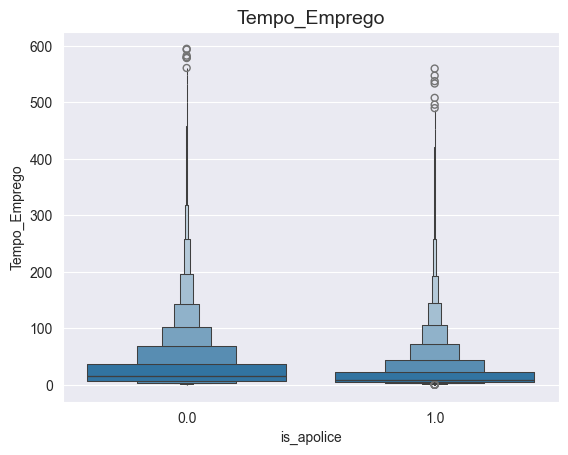

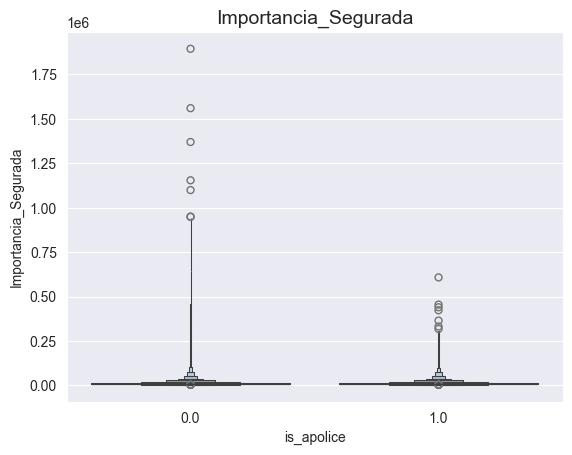

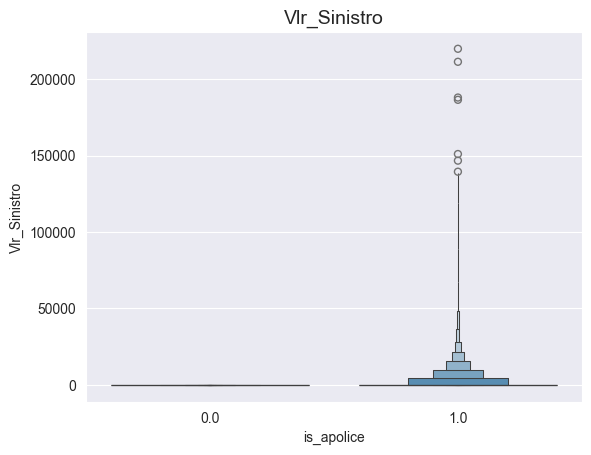

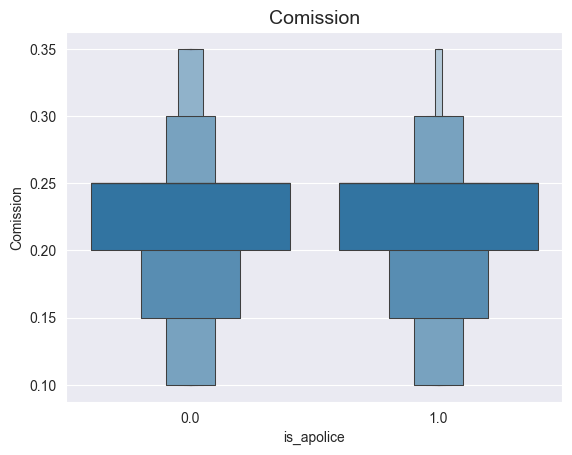

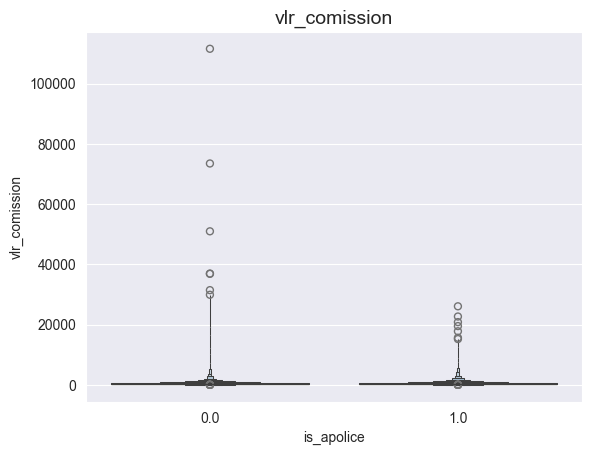

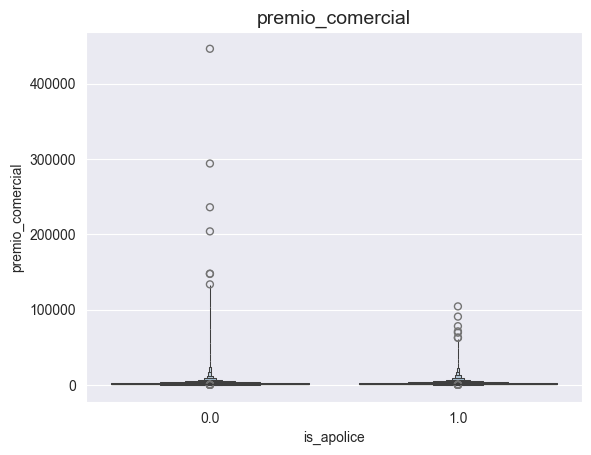

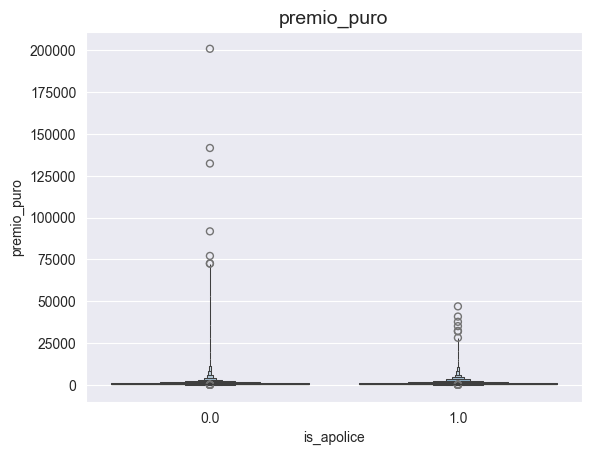

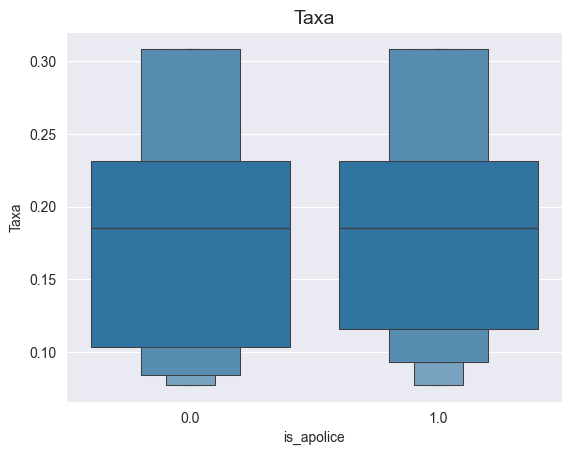

In [28]:
lst_features = ['premio_input', 'Tempo_Emprego', 'Importancia_Segurada', 
'Vlr_Sinistro', 'Comission',  'vlr_comission', 'premio_comercial', 'premio_puro', 'Taxa']

plt.figure(figsize=(10, 6))

for Names in lst_features: 
    ax = sns.boxenplot(data=df_conversion, x='is_apolice', y=Names)
    ax.set_title(Names, fontdict={'fontsize': 14})
    plt.show()

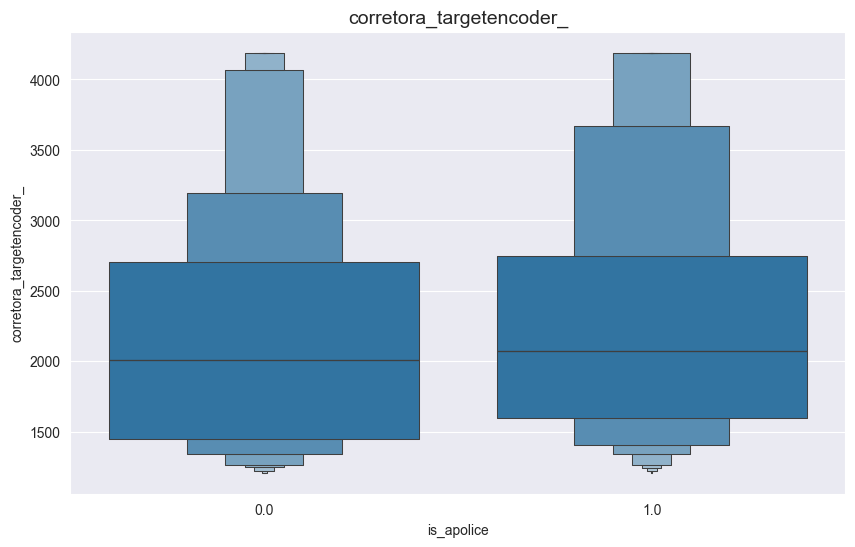

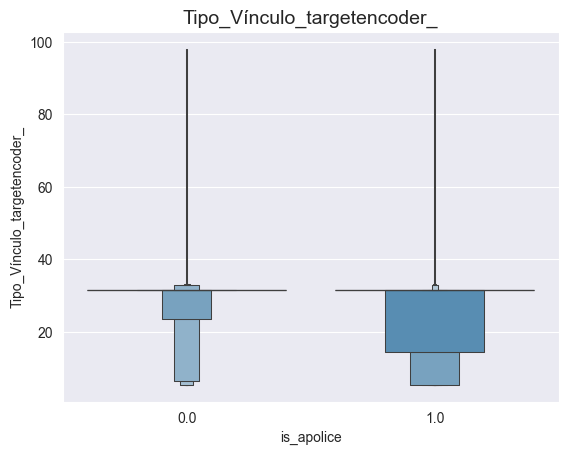

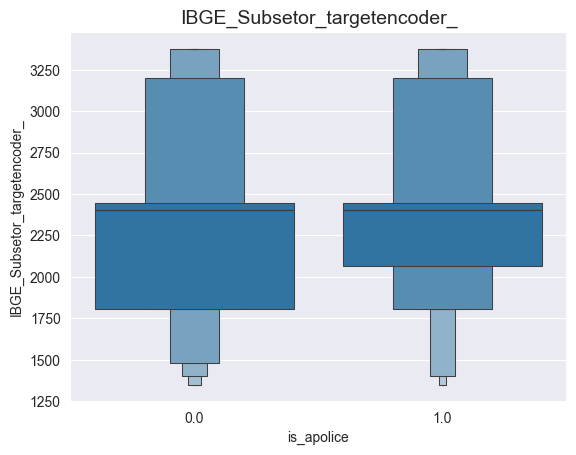

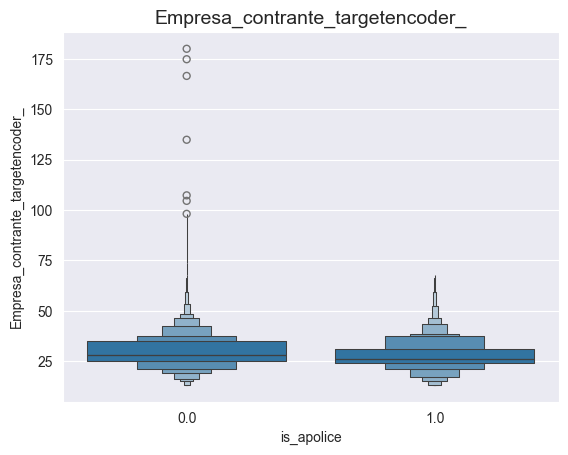

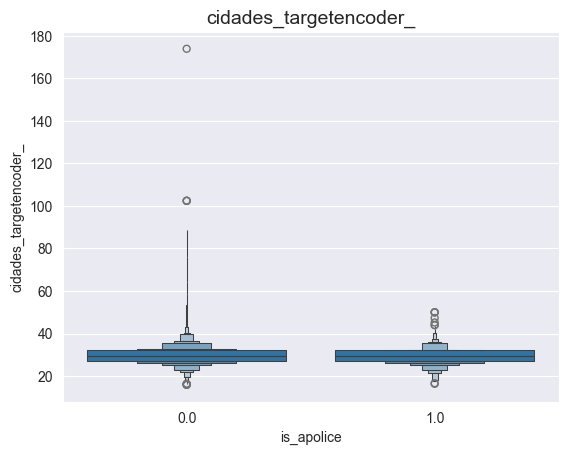

In [29]:
plt.figure(figsize=(10, 6))

for Names in nominal_columns_new : 
    ax = sns.boxenplot(data=df_conversion, x='is_apolice', y=Names)
    ax.set_title(Names, fontdict={'fontsize': 14})
    plt.show()

## Selection and MinMaxScaler() from features ##

In [30]:
df_conversion.columns, df_conversion.shape

(Index(['id', 'Faixa_Hora_Contrat', 'Faixa_Remun_Dezem_(SM)',
        'Escolaridade_após_2005', 'Qtd_Hora_Contr', 'Idade', 'Ind_Simples',
        'Ind_Portador_Defic', 'Qtd_Dias_Afastamento', 'Raça_Cor', 'corretora',
        'Sexo_Trabalhador', 'Tamanho_Estabelecimento', 'Tipo_Admissão',
        'Tipo_Defic', 'Tipo_Vínculo', 'IBGE_Subsetor', 'Ind_Trab_Intermitente',
        'Ind_Trab_Parcial', 'premio_input', 'Tempo_Emprego',
        'Importancia_Segurada', 'is_cotacao', 'is_apolice', 'is_sinistro',
        'Vlr_Sinistro', 'Comission', 'Empresa_contrante', 'cidades',
        'premio_comercial', 'vlr_comission', 'premio_puro', 'DA', 'Lucro',
        'Faixa_Etária', 'Taxa', 'corretora_targetencoder_',
        'Tipo_Vínculo_targetencoder_', 'IBGE_Subsetor_targetencoder_',
        'Empresa_contrante_targetencoder_', 'cidades_targetencoder_'],
       dtype='object'),
 (252291, 41))

In [31]:
features_selected_conversion = df_conversion[['id', 
                                              'Faixa_Hora_Contrat', 
                                              #'Faixa_Remun_Dezem_(SM)',
                                          'Escolaridade_após_2005', 'Qtd_Hora_Contr', 'Idade', 
                                          'Ind_Simples',
                                          'Ind_Portador_Defic', 
                                          'Qtd_Dias_Afastamento', 
                                          'Raça_Cor', 
                                          'Sexo_Trabalhador', 
                                          'Tamanho_Estabelecimento', 'Tipo_Admissão',
                                          #'Tipo_Defic', 
                                          #'Ind_Trab_Intermitente', 
                                          #'Ind_Trab_Parcial', 
                                          'premio_input', 'Tempo_Emprego',
                                          'Importancia_Segurada', 
                                          #'Vlr_Sinistro', 
                                          'Comission', 
                                          #'premio_comercial', 
                                          'vlr_comission', 
                                          'premio_puro', 
                                          'corretora_targetencoder_', 'IBGE_Subsetor_targetencoder_',
                                          'Empresa_contrante_targetencoder_', 
                                          'cidades_targetencoder_', 
                                          'Tipo_Vínculo_targetencoder_',
                                          #'Faixa_Etária', 
                                          'Taxa', 'is_apolice'
                                          ]]

In [32]:
features_selected_conversion = features_selected_conversion.set_index(['id'])
features_selected_conversion.shape

(252291, 24)

In [33]:
features_selected_conversion['is_apolice'].value_counts(normalize=True)*100

is_apolice
0.000   78.482
1.000   21.518
Name: proportion, dtype: float64

In [34]:
lst_columns = features_selected_conversion.columns.tolist()
lst_columns.remove("is_apolice")
lst_columns

['Faixa_Hora_Contrat',
 'Escolaridade_após_2005',
 'Qtd_Hora_Contr',
 'Idade',
 'Ind_Simples',
 'Ind_Portador_Defic',
 'Qtd_Dias_Afastamento',
 'Raça_Cor',
 'Sexo_Trabalhador',
 'Tamanho_Estabelecimento',
 'Tipo_Admissão',
 'premio_input',
 'Tempo_Emprego',
 'Importancia_Segurada',
 'Comission',
 'vlr_comission',
 'premio_puro',
 'corretora_targetencoder_',
 'IBGE_Subsetor_targetencoder_',
 'Empresa_contrante_targetencoder_',
 'cidades_targetencoder_',
 'Tipo_Vínculo_targetencoder_',
 'Taxa']

In [35]:
#"""
sc = MinMaxScaler()

for  Names in lst_columns:  
    features_selected_conversion[Names] = sc.fit_transform(features_selected_conversion[[Names]])
#"""    

In [36]:
features_selected_conversion.head()

,Faixa_Hora_Contrat,Escolaridade_após_2005,Qtd_Hora_Contr,Idade,Ind_Simples,Ind_Portador_Defic,Qtd_Dias_Afastamento,Raça_Cor,Sexo_Trabalhador,Tamanho_Estabelecimento,Tipo_Admissão,premio_input,Tempo_Emprego,Importancia_Segurada,Comission,vlr_comission,premio_puro,corretora_targetencoder_,IBGE_Subsetor_targetencoder_,Empresa_contrante_targetencoder_,cidades_targetencoder_,Tipo_Vínculo_targetencoder_,Taxa,is_apolice
id,,,,,,,,,,,,,,,,,,,,,,,,
41,0.833,0.600,1.000,0.202,0.000,0.000,0.000,0.833,1.000,0.333,0.000,0.008,0.035,0.005,0.600,0.008,0.008,0.540,0.520,0.086,0.070,0.281,1.000,0.000
42,0.833,0.600,1.000,0.250,1.000,0.000,0.000,0.667,0.000,0.000,0.000,0.002,0.013,0.001,0.600,0.003,0.003,0.268,0.520,0.086,0.077,0.281,0.667,0.000
43,0.833,0.700,1.000,0.250,0.000,0.000,0.203,0.667,1.000,0.333,0.000,0.004,0.032,0.002,0.600,0.004,0.004,0.540,0.520,0.086,0.066,0.281,1.000,0.000
44,0.833,0.800,1.000,0.190,1.000,0.000,0.000,0.667,1.000,0.111,0.000,0.017,0.029,0.017,0.600,0.017,0.017,0.502,0.226,0.086,0.099,0.281,0.667,0.000
51,0.833,0.400,1.000,0.560,1.000,0.000,0.000,0.167,0.000,0.000,0.000,0.006,0.105,0.006,0.600,0.007,0.006,0.667,0.540,0.086,0.118,0.281,0.667,0.000


## Training Model ##

In [37]:
features_selected_conversion.columns

Index(['Faixa_Hora_Contrat', 'Escolaridade_após_2005', 'Qtd_Hora_Contr',
       'Idade', 'Ind_Simples', 'Ind_Portador_Defic', 'Qtd_Dias_Afastamento',
       'Raça_Cor', 'Sexo_Trabalhador', 'Tamanho_Estabelecimento',
       'Tipo_Admissão', 'premio_input', 'Tempo_Emprego',
       'Importancia_Segurada', 'Comission', 'vlr_comission', 'premio_puro',
       'corretora_targetencoder_', 'IBGE_Subsetor_targetencoder_',
       'Empresa_contrante_targetencoder_', 'cidades_targetencoder_',
       'Tipo_Vínculo_targetencoder_', 'Taxa', 'is_apolice'],
      dtype='object')

In [38]:
X = features_selected_conversion.drop(columns='is_apolice')
y = features_selected_conversion['is_apolice']

In [39]:
X.shape, y.shape

((252291, 23), (252291,))

In [40]:
random_ = 2023
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=random_, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((201832, 23), (50459, 23), (201832,), (50459,))

In [41]:
clf = lgb.LGBMClassifier(n_jobs=-1,random_state=random_)
#clf = lgb.LGBMClassifier(learning_rate = 0.15, metric = 'l1', n_estimators = 24)
#clf = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', n_estimators = 20, num_leaves = 38)

model = clf.fit(X_train,y_train)

predicted = model.predict(X_test)

y_pred = clf.predict_proba(X_test)[:,1]

y_pred_train = clf.predict_proba(X_train)[:,1]

probabilities = clf.predict_proba(X_test)[:,1]

## Out-put of Model ##

In [43]:
print("accuracy of testing data :", roc_auc_score(y_test, y_pred))
print("accuracy of training data :", roc_auc_score(y_train, y_pred_train))

accuracy of testing data : 0.8616195642061892
accuracy of training data : 0.8654483766187675


In [44]:
print('Training accuracy {:.4f}'.format(clf.score(X_train, y_train)))
print('Testing accuracy {:.4f}'.format(clf.score(X_test, y_test)))

Training accuracy 0.8396
Testing accuracy 0.8383


In [45]:
fp, tp, th = roc_curve(y_test, predicted)
print('accuracy score...:', accuracy_score(y_test, predicted)*100)
print('precision score..:', precision_score(y_test, predicted)*100)
print('recall score.....:', recall_score(y_test, predicted)*100)
print('f1 score.........:', f1_score(y_test, predicted, average='weighted')*100)
print('auc..............:', auc(fp, tp)*100)

[LightGBM] [Info] Number of positive: 43430, number of negative: 158402
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006743 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2284
[LightGBM] [Info] Number of data points in the train set: 201832, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.215179 -> initscore=-1.293986
[LightGBM] [Info] Start training from score -1.293986
accuracy score...: 83.8324183990963
precision score..: 72.74258760107817
recall score.....: 39.7679130594953
f1 score.........: 81.93618746911831
auc..............: 67.84107882463918


In [46]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90     39601
         1.0       0.73      0.40      0.51     10858

    accuracy                           0.84     50459
   macro avg       0.79      0.68      0.71     50459
weighted avg       0.83      0.84      0.82     50459



In [47]:
predictions = clf.predict(X_test)
print(metrics.confusion_matrix(y_test, predictions))
#                           Valor Predito
#                        Negativo - Positivo
# Valor Atual - Negativo [   TN   -   FP   ]
# Valor Atual - Positivo [   FN   -   TP   ]

[[37983  1618]
 [ 6540  4318]]


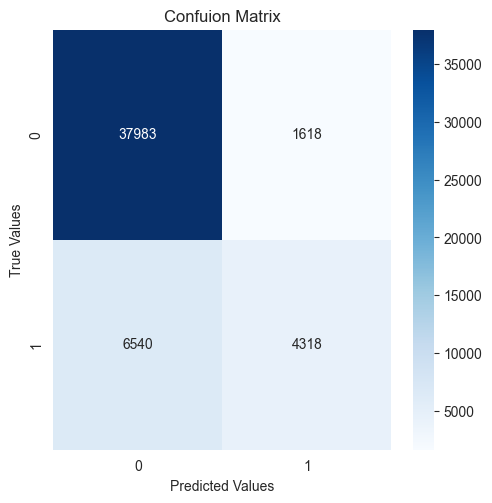

In [48]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(12,12))
plt.subplot(221)
sns.heatmap(conf_matrix, fmt = "d",annot=True, cmap='Blues')
plt.title('Confuion Matrix')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

Area under curve :  0.8616195642061892 



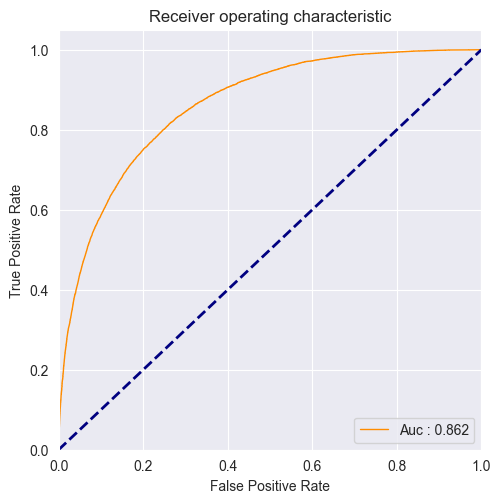

In [49]:
#roc_auc_score
model_roc_auc = roc_auc_score(y_test, probabilities)
print ("Area under curve : ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_test ,probabilities)

plt.figure(figsize=(12,12))
plt.subplot(222)
plt.plot(fpr, tpr, color='darkorange', lw=1, label = "Auc : %.3f" %model_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

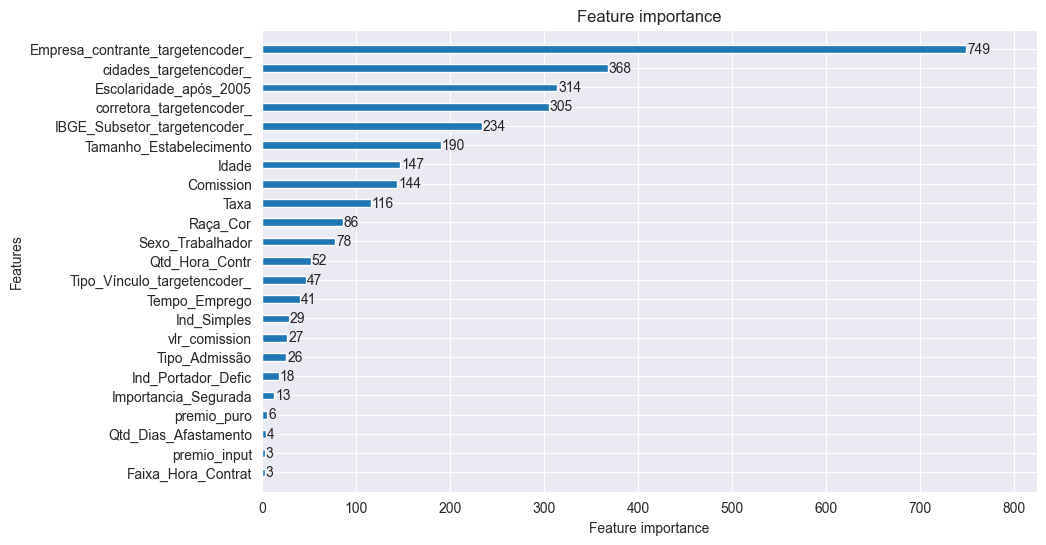

In [50]:
lgb.plot_importance(clf, height = 0.4, 
                         max_num_features = 30, 
                         figsize = (10,6))
plt.show()

In [51]:
coefficients = pd.DataFrame(clf.feature_importances_)
column_df = pd.DataFrame(X.columns)
coef_sumry = (pd.merge(coefficients, column_df, left_index= True, right_index=True, how = "left"))
coef_sumry.columns = ["coefficients","features"]
coef_sumry = coef_sumry.sort_values(by = "coefficients",ascending = False)
coef_sumry = coef_sumry[["features", "coefficients"]]
coef_sumry

,features,coefficients
19,Empresa_contrante_targetencoder_,749
20,cidades_targetencoder_,368
1,Escolaridade_após_2005,314
17,corretora_targetencoder_,305
18,IBGE_Subsetor_targetencoder_,234
9,Tamanho_Estabelecimento,190
3,Idade,147
14,Comission,144
22,Taxa,116
7,Raça_Cor,86


In [52]:
features_importances = pd.DataFrame(columns=['feature_name','feature_importance'])
features_importances['feature_name'] = clf.feature_name_
features_importances['feature_importance'] = clf.feature_importances_
features_importances.sort_values('feature_importance', ascending=False)

,feature_name,feature_importance
19,Empresa_contrante_targetencoder_,749
20,cidades_targetencoder_,368
1,Escolaridade_após_2005,314
17,corretora_targetencoder_,305
18,IBGE_Subsetor_targetencoder_,234
9,Tamanho_Estabelecimento,190
3,Idade,147
14,Comission,144
22,Taxa,116
7,Raça_Cor,86


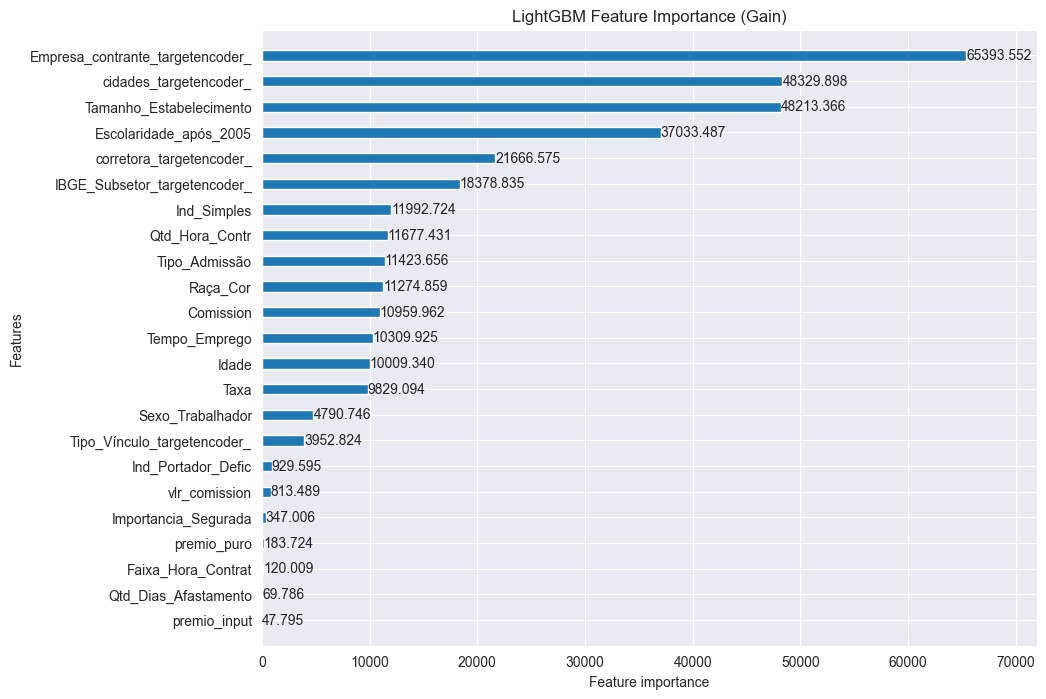

In [53]:
lgb.plot_importance(clf, height = 0.4, importance_type="gain",
                         max_num_features = 30, title="LightGBM Feature Importance (Gain)",
                         figsize = (10, 8))
plt.show()

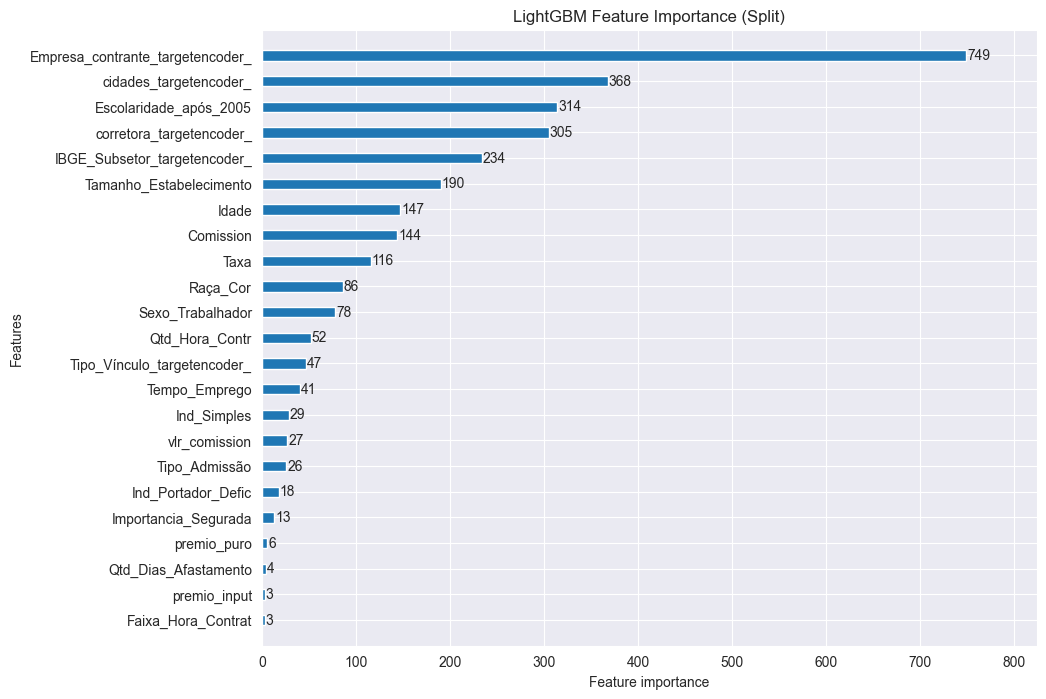

In [54]:
lgb.plot_importance(clf, height = 0.4, importance_type="split",
                         max_num_features = 30, title="LightGBM Feature Importance (Split)",
                         figsize = (10, 8))
plt.show()

## Feature Importance Using LOFO ##

In [55]:
sample_df = features_selected_conversion.sample(frac=0.03, random_state=0)
sample_df.sort_values("is_apolice", inplace=True) # Sort by time for time split validation
sample_df.shape

(7569, 24)

In [56]:
cv = KFold(n_splits=4, shuffle=False, random_state=None)
dataset = Dataset(df=sample_df, target="is_apolice", features=[col for col in sample_df.columns if col != "is_apolice"])

In [57]:
#lofo_imp = LOFOImportance(dataset, cv=cv, scoring="roc_auc")
lofo_imp = LOFOImportance(dataset, model=clf, scoring="roc_auc")

In [58]:
warnings.filterwarnings('ignore')
importance_df = lofo_imp.get_importance()

[LightGBM] [Info] Number of positive: 1245, number of negative: 4431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2045
[LightGBM] [Info] Number of data points in the train set: 5676, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219345 -> initscore=-1.269490
[LightGBM] [Info] Start training from score -1.269490
[LightGBM] [Info] Number of positive: 1246, number of negative: 4431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000712 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2050
[LightGBM] [Info] Number of data points in the train set: 5677, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219482 -> initscore=-1.268687
[LightGBM] [Info] Start training from score -1.268687
[LightGBM] [Info] 

  0%|          | 0/23 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 1245, number of negative: 4431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000806 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2043
[LightGBM] [Info] Number of data points in the train set: 5676, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219345 -> initscore=-1.269490
[LightGBM] [Info] Start training from score -1.269490
[LightGBM] [Info] Number of positive: 1246, number of negative: 4431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000626 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the train set: 5677, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219482 -> initscore=-1.268687
[LightGBM] [Info] Start training from score -1.268687
[LightGBM] [Info] 

  4%|▍         | 1/23 [00:00<00:10,  2.10it/s]

[LightGBM] [Info] Number of positive: 1246, number of negative: 4431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001009 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2045
[LightGBM] [Info] Number of data points in the train set: 5677, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219482 -> initscore=-1.268687
[LightGBM] [Info] Start training from score -1.268687
[LightGBM] [Info] Number of positive: 1245, number of negative: 4431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000595 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1971
[LightGBM] [Info] Number of data points in the train set: 5676, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219345 -> initscore=-1.269490
[LightGBM] [Info] Start training from score -1.269490
[LightGBM] [Info] 

  9%|▊         | 2/23 [00:00<00:09,  2.12it/s]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000716 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1969
[LightGBM] [Info] Number of data points in the train set: 5677, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219482 -> initscore=-1.268687
[LightGBM] [Info] Start training from score -1.268687
[LightGBM] [Info] Number of positive: 1245, number of negative: 4431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000785 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1842
[LightGBM] [Info] Number of data points in the train set: 5676, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219345 -> initscore=-1.269490
[LightGBM] [Info] Start training from score -1.269490
[LightGBM] [Info] Number of positive: 1246, number of negative: 4431
[LightGBM] [Info]

 13%|█▎        | 3/23 [00:01<00:10,  1.83it/s]

[LightGBM] [Info] Number of positive: 1246, number of negative: 4431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000975 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1850
[LightGBM] [Info] Number of data points in the train set: 5677, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219482 -> initscore=-1.268687
[LightGBM] [Info] Start training from score -1.268687
[LightGBM] [Info] Number of positive: 1245, number of negative: 4431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000638 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1814
[LightGBM] [Info] Number of data points in the train set: 5676, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219345 -> initscore=-1.269490
[LightGBM] [Info] Start training from score -1.269490
[LightGBM] [Info] 

 17%|█▋        | 4/23 [00:01<00:09,  2.03it/s]

[LightGBM] [Info] Number of positive: 1246, number of negative: 4431
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1812
[LightGBM] [Info] Number of data points in the train set: 5677, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219482 -> initscore=-1.268687
[LightGBM] [Info] Start training from score -1.268687
[LightGBM] [Info] Number of positive: 1246, number of negative: 4431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000972 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1812
[LightGBM] [Info] Number of data points in the train set: 5677, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219482 -> initscore=-1.268687
[LightGB

 22%|██▏       | 5/23 [00:02<00:08,  2.20it/s]

[LightGBM] [Info] Number of positive: 1246, number of negative: 4431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000934 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2045
[LightGBM] [Info] Number of data points in the train set: 5677, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219482 -> initscore=-1.268687
[LightGBM] [Info] Start training from score -1.268687
[LightGBM] [Info] Number of positive: 1245, number of negative: 4431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000835 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1790
[LightGBM] [Info] Number of data points in the train set: 5676, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219345 -> initscore=-1.269490
[LightGBM] [Info] Start training from score -1.269490
[LightGBM] [Info] 

 26%|██▌       | 6/23 [00:02<00:07,  2.33it/s]

[LightGBM] [Info] Number of positive: 1246, number of negative: 4431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000583 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1792
[LightGBM] [Info] Number of data points in the train set: 5677, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219482 -> initscore=-1.268687
[LightGBM] [Info] Start training from score -1.268687
[LightGBM] [Info] Number of positive: 1246, number of negative: 4431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000648 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1792
[LightGBM] [Info] Number of data points in the train set: 5677, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219482 -> initscore=-1.268687
[LightGBM] [Info] Start training from score -1.268687
[LightGBM] [Info] 

 30%|███       | 7/23 [00:03<00:08,  1.93it/s]

[LightGBM] [Info] Number of positive: 1245, number of negative: 4431
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1790
[LightGBM] [Info] Number of data points in the train set: 5676, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219345 -> initscore=-1.269490
[LightGBM] [Info] Start training from score -1.269490
[LightGBM] [Info] Number of positive: 1246, number of negative: 4431
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1795
[LightGBM] [Info] Number of data points in the train set: 5677, number of used features: 22
[LightGBM] [Info] [binar

 35%|███▍      | 8/23 [00:03<00:07,  2.09it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000942 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1792
[LightGBM] [Info] Number of data points in the train set: 5677, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219482 -> initscore=-1.268687
[LightGBM] [Info] Start training from score -1.268687
[LightGBM] [Info] Number of positive: 1246, number of negative: 4431
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1792
[LightGBM] [Info] Number of data points in the train set: 5677, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219482 -> initscore=-1.268687
[LightGBM] [Info] Start training from score -1.268687
[LightGBM] [Info] Numbe

 39%|███▉      | 9/23 [00:04<00:06,  2.12it/s]

[LightGBM] [Info] Number of positive: 1245, number of negative: 4431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000677 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2033
[LightGBM] [Info] Number of data points in the train set: 5676, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219345 -> initscore=-1.269490
[LightGBM] [Info] Start training from score -1.269490
[LightGBM] [Info] Number of positive: 1246, number of negative: 4431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000984 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2038
[LightGBM] [Info] Number of data points in the train set: 5677, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219482 -> initscore=-1.268687
[LightGBM] [Info] Start training from score -1.268687


 43%|████▎     | 10/23 [00:04<00:05,  2.19it/s]

[LightGBM] [Info] Number of positive: 1246, number of negative: 4431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000648 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2035
[LightGBM] [Info] Number of data points in the train set: 5677, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219482 -> initscore=-1.268687
[LightGBM] [Info] Start training from score -1.268687
[LightGBM] [Info] Number of positive: 1246, number of negative: 4431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000629 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2035
[LightGBM] [Info] Number of data points in the train set: 5677, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219482 -> initscore=-1.268687
[LightGBM] [Info] Start training from score -1.268687
[LightGBM] [Info] 

 48%|████▊     | 11/23 [00:05<00:06,  1.97it/s]

[LightGBM] [Info] Number of positive: 1245, number of negative: 4431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000854 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2036
[LightGBM] [Info] Number of data points in the train set: 5676, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219345 -> initscore=-1.269490
[LightGBM] [Info] Start training from score -1.269490
[LightGBM] [Info] Number of positive: 1246, number of negative: 4431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000775 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2041
[LightGBM] [Info] Number of data points in the train set: 5677, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219482 -> initscore=-1.268687
[LightGBM] [Info] Start training from score -1.268687
[LightGBM] [Info] 

 52%|█████▏    | 12/23 [00:05<00:05,  2.11it/s]

[LightGBM] [Info] Number of positive: 1246, number of negative: 4431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000952 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2038
[LightGBM] [Info] Number of data points in the train set: 5677, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219482 -> initscore=-1.268687
[LightGBM] [Info] Start training from score -1.268687
[LightGBM] [Info] Number of positive: 1245, number of negative: 4431
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2039
[LightGBM] [Info] Number of data points in the train set: 5676, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219345 -> initscore=-1.269490
[LightGB

 57%|█████▋    | 13/23 [00:06<00:04,  2.23it/s]

[LightGBM] [Info] Number of positive: 1246, number of negative: 4431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000885 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2041
[LightGBM] [Info] Number of data points in the train set: 5677, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219482 -> initscore=-1.268687
[LightGBM] [Info] Start training from score -1.268687
[LightGBM] [Info] Number of positive: 1246, number of negative: 4431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000792 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2041
[LightGBM] [Info] Number of data points in the train set: 5677, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219482 -> initscore=-1.268687
[LightGBM] [Info] Start training from score -1.268687
[LightGBM] [Info] 

 61%|██████    | 14/23 [00:06<00:03,  2.31it/s]

[LightGBM] [Info] Number of positive: 1246, number of negative: 4431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000785 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2045
[LightGBM] [Info] Number of data points in the train set: 5677, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219482 -> initscore=-1.268687
[LightGBM] [Info] Start training from score -1.268687
[LightGBM] [Info] Number of positive: 1246, number of negative: 4431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000857 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2045
[LightGBM] [Info] Number of data points in the train set: 5677, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219482 -> initscore=-1.268687
[LightGBM] [Info] Start training from score -1.268687
[LightGBM] [Info] 

 65%|██████▌   | 15/23 [00:06<00:03,  2.33it/s]

[LightGBM] [Info] Number of positive: 1246, number of negative: 4431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001016 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 5677, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219482 -> initscore=-1.268687
[LightGBM] [Info] Start training from score -1.268687
[LightGBM] [Info] Number of positive: 1246, number of negative: 4431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000847 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 5677, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219482 -> initscore=-1.268687
[LightGBM] [Info] Start training from score -1.268687
[LightGBM] [Info] 

 70%|██████▉   | 16/23 [00:07<00:03,  2.09it/s]

[LightGBM] [Info] Number of positive: 1245, number of negative: 4431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000801 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1970
[LightGBM] [Info] Number of data points in the train set: 5676, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219345 -> initscore=-1.269490
[LightGBM] [Info] Start training from score -1.269490
[LightGBM] [Info] Number of positive: 1246, number of negative: 4431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000971 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1975
[LightGBM] [Info] Number of data points in the train set: 5677, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219482 -> initscore=-1.268687
[LightGBM] [Info] Start training from score -1.268687
[LightGBM] [Info] 

 74%|███████▍  | 17/23 [00:07<00:02,  2.22it/s]

[LightGBM] [Info] Number of positive: 1246, number of negative: 4431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000883 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1972
[LightGBM] [Info] Number of data points in the train set: 5677, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219482 -> initscore=-1.268687
[LightGBM] [Info] Start training from score -1.268687
[LightGBM] [Info] Number of positive: 1245, number of negative: 4431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001094 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2034
[LightGBM] [Info] Number of data points in the train set: 5676, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219345 -> initscore=-1.269490
[LightGBM] [Info] Start training from score -1.269490
[LightGBM] [Info] 

 78%|███████▊  | 18/23 [00:08<00:02,  2.31it/s]

[LightGBM] [Info] Number of positive: 1246, number of negative: 4431
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000495 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2036
[LightGBM] [Info] Number of data points in the train set: 5677, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219482 -> initscore=-1.268687
[LightGBM] [Info] Start training from score -1.268687
[LightGBM] [Info] Number of positive: 1246, number of negative: 4431
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2036
[LightGBM] [Info] Number of data points in the train set: 5677, number of used features: 22
[LightGBM] [Info] [binar

 83%|████████▎ | 19/23 [00:08<00:01,  2.37it/s]

[LightGBM] [Info] Number of positive: 1246, number of negative: 4431
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1792
[LightGBM] [Info] Number of data points in the train set: 5677, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219482 -> initscore=-1.268687
[LightGBM] [Info] Start training from score -1.268687
[LightGBM] [Info] Number of positive: 1246, number of negative: 4431
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1792
[LightGBM] [Info] Number of data points in the train set: 5677, number of used features: 22
[LightGBM] [Info] [binar

 87%|████████▋ | 20/23 [00:09<00:01,  2.25it/s]

[LightGBM] [Info] Number of positive: 1246, number of negative: 4431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001104 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 5677, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219482 -> initscore=-1.268687
[LightGBM] [Info] Start training from score -1.268687
[LightGBM] [Info] Number of positive: 1245, number of negative: 4431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001105 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2035
[LightGBM] [Info] Number of data points in the train set: 5676, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219345 -> initscore=-1.269490
[LightGBM] [Info] Start training from score -1.269490
[LightGBM] [Info] 

 91%|█████████▏| 21/23 [00:09<00:00,  2.14it/s]

[LightGBM] [Info] Number of positive: 1246, number of negative: 4431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2037
[LightGBM] [Info] Number of data points in the train set: 5677, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219482 -> initscore=-1.268687
[LightGBM] [Info] Start training from score -1.268687
[LightGBM] [Info] Number of positive: 1245, number of negative: 4431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000890 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1986
[LightGBM] [Info] Number of data points in the train set: 5676, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219345 -> initscore=-1.269490
[LightGBM] [Info] Start training from score -1.269490
[LightGBM] [Info] 

 96%|█████████▌| 22/23 [00:10<00:00,  2.26it/s]

[LightGBM] [Info] Number of positive: 1245, number of negative: 4431
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1790
[LightGBM] [Info] Number of data points in the train set: 5676, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219345 -> initscore=-1.269490
[LightGBM] [Info] Start training from score -1.269490
[LightGBM] [Info] Number of positive: 1246, number of negative: 4431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000871 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1795
[LightGBM] [Info] Number of data points in the train set: 5677, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219482 -> initscore=-1.268687
[LightGB

100%|██████████| 23/23 [00:10<00:00,  2.19it/s]

[LightGBM] [Info] Number of positive: 1246, number of negative: 4431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000680 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1792
[LightGBM] [Info] Number of data points in the train set: 5677, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219482 -> initscore=-1.268687
[LightGBM] [Info] Start training from score -1.268687
[LightGBM] [Info] Number of positive: 1246, number of negative: 4431
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1792
[LightGBM] [Info] Number of data points in the train set: 5677, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219482 -> initscore=-1.268687
[LightGB

In [59]:
importance_df.head()

,feature,importance_mean,importance_std,val_imp_0,val_imp_1,val_imp_2,val_imp_3
3,cidades_targetencoder_,0.031,0.008,0.029,0.034,0.019,0.041
17,Escolaridade_após_2005,0.026,0.002,0.024,0.023,0.029,0.026
15,Tamanho_Estabelecimento,0.023,0.006,0.021,0.030,0.014,0.026
2,Empresa_contrante_targetencoder_,0.021,0.003,0.024,0.016,0.021,0.024
21,Idade,0.007,0.009,0.005,-0.006,0.008,0.020


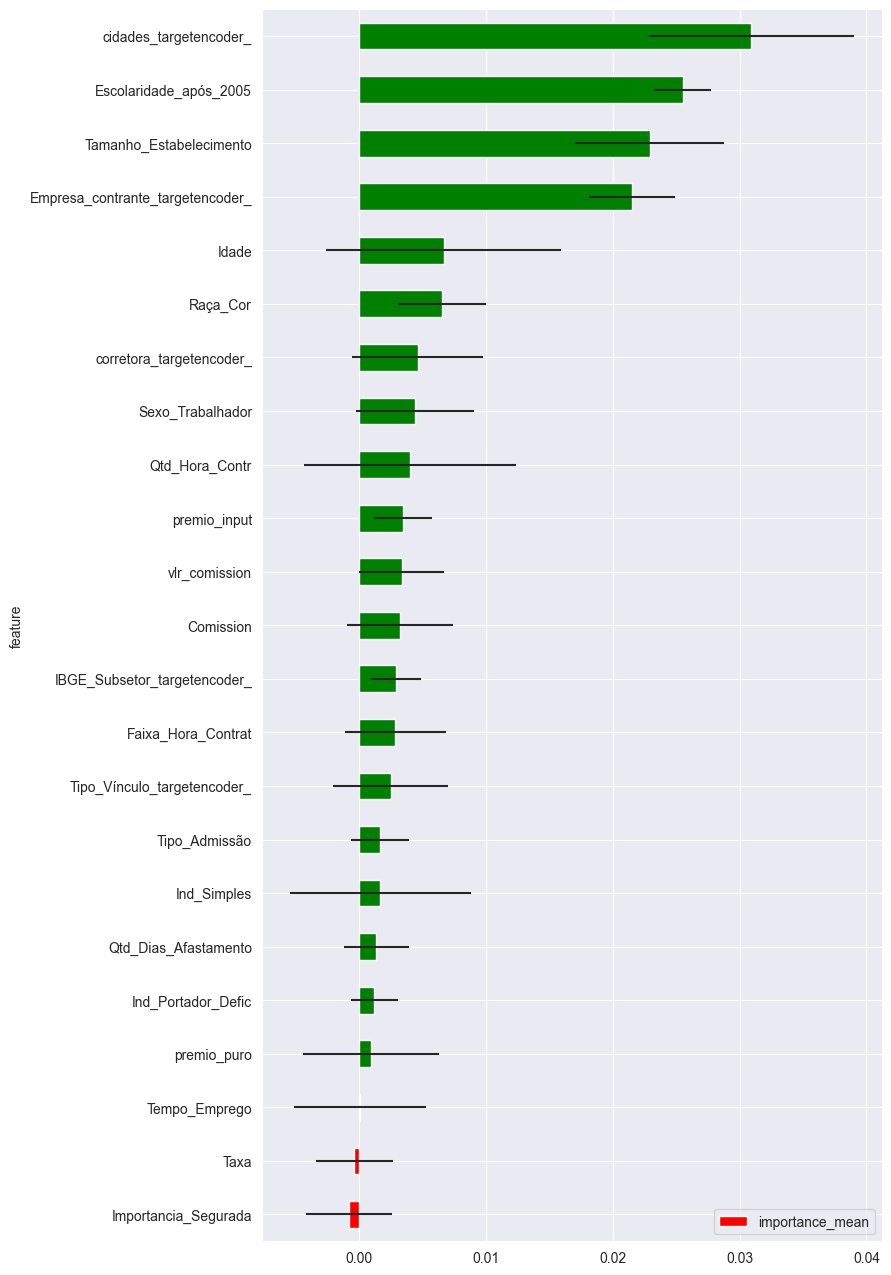

In [60]:
plot_importance(importance_df, figsize=(8,16))

## LightGBM & tuning with optuna ##

In [61]:
import optuna
import warnings
warnings.filterwarnings('ignore')

In [62]:
study = optuna.create_study(direction="maximize")

[I 2024-06-09 17:17:12,320] A new study created in memory with name: no-name-c120f5bb-1563-45af-b1a0-b4f161f7e473


In [63]:
def objective(trial):
  # Determine the hyperperatemers and their value ranges
  learning_rate = trial.suggest_float("learning_rate", 0.01, 0.1)
  num_leaves = trial.suggest_int("num_leaves", 2, 256)
  max_depth = trial.suggest_int("max_depth", -1, 50)
  min_child_samples = trial.suggest_int("min_child_samples", 5, 100)
  subsample = trial.suggest_float("subsample", 0.5, 1.0)
  colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1.0)
  n_estimators = trial.suggest_int("n_estimators", 100, 1000)
  
  # Create and train the model
  model = lgb.LGBMClassifier(
  learning_rate=learning_rate,
  num_leaves=num_leaves,
  max_depth=max_depth,
  min_child_samples=min_child_samples,
  subsample=subsample,
  colsample_bytree=colsample_bytree,
  n_estimators=n_estimators,
  random_state=42
  )
  model.fit(X_train, y_train)
  
  # Evaluate model and return the metric
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

In [64]:
study.optimize(objective, n_trials=20)
#study.optimize(objective, n_trials=100)
print("Best trial:")
print(" Value: {}".format(study.best_trial.value))
print(" Params: {}".format(study.best_trial.params))

  File "c:\Users\luand\Documents\PRJ_OTIM_PRICING\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[LightGBM] [Info] Number of positive: 43430, number of negative: 158402
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2285
[LightGBM] [Info] Number of data points in the train set: 201832, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.215179 -> initscore=-1.293986
[LightGBM] [Info] Start training from score -1.293986


[I 2024-06-09 17:17:15,052] Trial 0 finished with value: 0.8418319824015538 and parameters: {'learning_rate': 0.02495478010967145, 'num_leaves': 60, 'max_depth': 46, 'min_child_samples': 96, 'subsample': 0.5389522356162174, 'colsample_bytree': 0.634674766694902, 'n_estimators': 297}. Best is trial 0 with value: 0.8418319824015538.


[LightGBM] [Info] Number of positive: 43430, number of negative: 158402
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2285
[LightGBM] [Info] Number of data points in the train set: 201832, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.215179 -> initscore=-1.293986
[LightGBM] [Info] Start training from score -1.293986
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-06-09 17:17:23,106] Trial 1 finished with value: 0.8653163954894072 and parameters: {'learning_rate': 0.06424341128428811, 'num_leaves': 147, 'max_depth': 12, 'min_child_samples': 25, 'subsample': 0.5827545737610076, 'colsample_bytree': 0.6190194437768348, 'n_estimators': 817}. Best is trial 1 with value: 0.8653163954894072.


[LightGBM] [Info] Number of positive: 43430, number of negative: 158402
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2285
[LightGBM] [Info] Number of data points in the train set: 201832, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.215179 -> initscore=-1.293986
[LightGBM] [Info] Start training from score -1.293986


[I 2024-06-09 17:17:24,756] Trial 2 finished with value: 0.7917715372876989 and parameters: {'learning_rate': 0.013307432390242804, 'num_leaves': 3, 'max_depth': 33, 'min_child_samples': 18, 'subsample': 0.5805763923426355, 'colsample_bytree': 0.8998727146665743, 'n_estimators': 590}. Best is trial 1 with value: 0.8653163954894072.


[LightGBM] [Info] Number of positive: 43430, number of negative: 158402
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007979 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2285
[LightGBM] [Info] Number of data points in the train set: 201832, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.215179 -> initscore=-1.293986
[LightGBM] [Info] Start training from score -1.293986
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-06-09 17:17:29,106] Trial 3 finished with value: 0.8284151489327969 and parameters: {'learning_rate': 0.027156286633819693, 'num_leaves': 221, 'max_depth': 4, 'min_child_samples': 28, 'subsample': 0.5895496190035456, 'colsample_bytree': 0.5433083564792272, 'n_estimators': 721}. Best is trial 1 with value: 0.8653163954894072.


[LightGBM] [Info] Number of positive: 43430, number of negative: 158402
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008778 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2285
[LightGBM] [Info] Number of data points in the train set: 201832, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.215179 -> initscore=-1.293986
[LightGBM] [Info] Start training from score -1.293986


[I 2024-06-09 17:17:38,101] Trial 4 finished with value: 0.8652767593491746 and parameters: {'learning_rate': 0.0895573707004512, 'num_leaves': 157, 'max_depth': 17, 'min_child_samples': 32, 'subsample': 0.6854401471565573, 'colsample_bytree': 0.5970288318842789, 'n_estimators': 830}. Best is trial 1 with value: 0.8653163954894072.


[LightGBM] [Info] Number of positive: 43430, number of negative: 158402
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012705 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2285
[LightGBM] [Info] Number of data points in the train set: 201832, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.215179 -> initscore=-1.293986
[LightGBM] [Info] Start training from score -1.293986


[I 2024-06-09 17:17:44,806] Trial 5 finished with value: 0.8648011256663826 and parameters: {'learning_rate': 0.058876953760406546, 'num_leaves': 156, 'max_depth': 39, 'min_child_samples': 18, 'subsample': 0.6785239321792647, 'colsample_bytree': 0.7480424234465404, 'n_estimators': 611}. Best is trial 1 with value: 0.8653163954894072.


[LightGBM] [Info] Number of positive: 43430, number of negative: 158402
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2285
[LightGBM] [Info] Number of data points in the train set: 201832, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.215179 -> initscore=-1.293986
[LightGBM] [Info] Start training from score -1.293986


[I 2024-06-09 17:17:55,151] Trial 6 finished with value: 0.859925880417765 and parameters: {'learning_rate': 0.021519437334427478, 'num_leaves': 140, 'max_depth': 20, 'min_child_samples': 14, 'subsample': 0.6687654762801851, 'colsample_bytree': 0.6585930968751041, 'n_estimators': 883}. Best is trial 1 with value: 0.8653163954894072.


[LightGBM] [Info] Number of positive: 43430, number of negative: 158402
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2285
[LightGBM] [Info] Number of data points in the train set: 201832, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.215179 -> initscore=-1.293986
[LightGBM] [Info] Start training from score -1.293986


[I 2024-06-09 17:17:58,278] Trial 7 finished with value: 0.8497393923779702 and parameters: {'learning_rate': 0.03836139281531214, 'num_leaves': 58, 'max_depth': 34, 'min_child_samples': 68, 'subsample': 0.6961620490567032, 'colsample_bytree': 0.7628762061018235, 'n_estimators': 357}. Best is trial 1 with value: 0.8653163954894072.


[LightGBM] [Info] Number of positive: 43430, number of negative: 158402
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2285
[LightGBM] [Info] Number of data points in the train set: 201832, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.215179 -> initscore=-1.293986
[LightGBM] [Info] Start training from score -1.293986


[I 2024-06-09 17:18:12,046] Trial 8 finished with value: 0.8668225688182485 and parameters: {'learning_rate': 0.03540755965492851, 'num_leaves': 210, 'max_depth': 28, 'min_child_samples': 33, 'subsample': 0.9232052501496324, 'colsample_bytree': 0.9593313844394622, 'n_estimators': 980}. Best is trial 8 with value: 0.8668225688182485.


[LightGBM] [Info] Number of positive: 43430, number of negative: 158402
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2285
[LightGBM] [Info] Number of data points in the train set: 201832, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.215179 -> initscore=-1.293986
[LightGBM] [Info] Start training from score -1.293986
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-06-09 17:18:13,146] Trial 9 finished with value: 0.8256604371866267 and parameters: {'learning_rate': 0.0878584188987631, 'num_leaves': 213, 'max_depth': 4, 'min_child_samples': 26, 'subsample': 0.9043737139564171, 'colsample_bytree': 0.6122850737933068, 'n_estimators': 181}. Best is trial 8 with value: 0.8668225688182485.


[LightGBM] [Info] Number of positive: 43430, number of negative: 158402
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009855 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2285
[LightGBM] [Info] Number of data points in the train set: 201832, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.215179 -> initscore=-1.293986
[LightGBM] [Info] Start training from score -1.293986


[I 2024-06-09 17:18:26,861] Trial 10 finished with value: 0.8673774747815057 and parameters: {'learning_rate': 0.04412419607419117, 'num_leaves': 240, 'max_depth': 27, 'min_child_samples': 49, 'subsample': 0.9952376994549448, 'colsample_bytree': 0.9906368291596718, 'n_estimators': 961}. Best is trial 10 with value: 0.8673774747815057.


[LightGBM] [Info] Number of positive: 43430, number of negative: 158402
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2285
[LightGBM] [Info] Number of data points in the train set: 201832, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.215179 -> initscore=-1.293986
[LightGBM] [Info] Start training from score -1.293986


[I 2024-06-09 17:18:41,966] Trial 11 finished with value: 0.8685665589884857 and parameters: {'learning_rate': 0.04425532458047562, 'num_leaves': 253, 'max_depth': 27, 'min_child_samples': 46, 'subsample': 0.9765216741365786, 'colsample_bytree': 0.9982357656043552, 'n_estimators': 994}. Best is trial 11 with value: 0.8685665589884857.


[LightGBM] [Info] Number of positive: 43430, number of negative: 158402
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2285
[LightGBM] [Info] Number of data points in the train set: 201832, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.215179 -> initscore=-1.293986
[LightGBM] [Info] Start training from score -1.293986


[I 2024-06-09 17:18:56,809] Trial 12 finished with value: 0.8674171109217385 and parameters: {'learning_rate': 0.04183132769533285, 'num_leaves': 252, 'max_depth': 26, 'min_child_samples': 55, 'subsample': 0.9842458915008008, 'colsample_bytree': 0.9764565747357851, 'n_estimators': 991}. Best is trial 11 with value: 0.8685665589884857.


[LightGBM] [Info] Number of positive: 43430, number of negative: 158402
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2285
[LightGBM] [Info] Number of data points in the train set: 201832, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.215179 -> initscore=-1.293986
[LightGBM] [Info] Start training from score -1.293986


[I 2024-06-09 17:19:07,609] Trial 13 finished with value: 0.867635109693018 and parameters: {'learning_rate': 0.06898159143103262, 'num_leaves': 252, 'max_depth': 50, 'min_child_samples': 63, 'subsample': 0.8223369724000953, 'colsample_bytree': 0.8758666776501747, 'n_estimators': 722}. Best is trial 11 with value: 0.8685665589884857.


[LightGBM] [Info] Number of positive: 43430, number of negative: 158402
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009816 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2285
[LightGBM] [Info] Number of data points in the train set: 201832, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.215179 -> initscore=-1.293986
[LightGBM] [Info] Start training from score -1.293986


[I 2024-06-09 17:19:16,372] Trial 14 finished with value: 0.8657325749618502 and parameters: {'learning_rate': 0.07075388467897459, 'num_leaves': 188, 'max_depth': 49, 'min_child_samples': 77, 'subsample': 0.8092316901359531, 'colsample_bytree': 0.8700260907872741, 'n_estimators': 702}. Best is trial 11 with value: 0.8685665589884857.


[LightGBM] [Info] Number of positive: 43430, number of negative: 158402
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007924 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2285
[LightGBM] [Info] Number of data points in the train set: 201832, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.215179 -> initscore=-1.293986
[LightGBM] [Info] Start training from score -1.293986


[I 2024-06-09 17:19:20,038] Trial 15 finished with value: 0.8604609683109059 and parameters: {'learning_rate': 0.07545436699183714, 'num_leaves': 92, 'max_depth': 42, 'min_child_samples': 50, 'subsample': 0.8276990825544854, 'colsample_bytree': 0.8396993684334428, 'n_estimators': 435}. Best is trial 11 with value: 0.8685665589884857.


[LightGBM] [Info] Number of positive: 43430, number of negative: 158402
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2285
[LightGBM] [Info] Number of data points in the train set: 201832, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.215179 -> initscore=-1.293986
[LightGBM] [Info] Start training from score -1.293986
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-06-09 17:19:27,667] Trial 16 finished with value: 0.8648407618066153 and parameters: {'learning_rate': 0.051977595305874875, 'num_leaves': 254, 'max_depth': 12, 'min_child_samples': 69, 'subsample': 0.8227670934962651, 'colsample_bytree': 0.9238279047333557, 'n_estimators': 461}. Best is trial 11 with value: 0.8685665589884857.


[LightGBM] [Info] Number of positive: 43430, number of negative: 158402
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2285
[LightGBM] [Info] Number of data points in the train set: 201832, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.215179 -> initscore=-1.293986
[LightGBM] [Info] Start training from score -1.293986


[I 2024-06-09 17:19:36,450] Trial 17 finished with value: 0.8673378386412731 and parameters: {'learning_rate': 0.0820259947642607, 'num_leaves': 187, 'max_depth': 37, 'min_child_samples': 84, 'subsample': 0.8993004319384503, 'colsample_bytree': 0.78526530249912, 'n_estimators': 719}. Best is trial 11 with value: 0.8685665589884857.


[LightGBM] [Info] Number of positive: 43430, number of negative: 158402
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009351 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2285
[LightGBM] [Info] Number of data points in the train set: 201832, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.215179 -> initscore=-1.293986
[LightGBM] [Info] Start training from score -1.293986


[I 2024-06-09 17:19:46,157] Trial 18 finished with value: 0.8668225688182485 and parameters: {'learning_rate': 0.09651175901598336, 'num_leaves': 191, 'max_depth': -1, 'min_child_samples': 42, 'subsample': 0.7698185011287537, 'colsample_bytree': 0.8301829470821251, 'n_estimators': 844}. Best is trial 11 with value: 0.8685665589884857.


[LightGBM] [Info] Number of positive: 43430, number of negative: 158402
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2285
[LightGBM] [Info] Number of data points in the train set: 201832, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.215179 -> initscore=-1.293986
[LightGBM] [Info] Start training from score -1.293986


[I 2024-06-09 17:19:56,253] Trial 19 finished with value: 0.8675360193424364 and parameters: {'learning_rate': 0.05496717713616492, 'num_leaves': 227, 'max_depth': 44, 'min_child_samples': 5, 'subsample': 0.9442756520830408, 'colsample_bytree': 0.9269341305206321, 'n_estimators': 651}. Best is trial 11 with value: 0.8685665589884857.


Best trial:
 Value: 0.8685665589884857
 Params: {'learning_rate': 0.04425532458047562, 'num_leaves': 253, 'max_depth': 27, 'min_child_samples': 46, 'subsample': 0.9765216741365786, 'colsample_bytree': 0.9982357656043552, 'n_estimators': 994}


In [66]:
optuna.visualization.plot_optimization_history(study)

In [67]:
optuna.visualization.plot_slice(study)

In [68]:
optuna.visualization.plot_param_importances(study)

In [69]:
print(study.best_params)

{'learning_rate': 0.04425532458047562, 'num_leaves': 253, 'max_depth': 27, 'min_child_samples': 46, 'subsample': 0.9765216741365786, 'colsample_bytree': 0.9982357656043552, 'n_estimators': 994}


In [74]:
best_params = study.best_params
best_params

{'learning_rate': 0.04425532458047562,
 'num_leaves': 253,
 'max_depth': 27,
 'min_child_samples': 46,
 'subsample': 0.9765216741365786,
 'colsample_bytree': 0.9982357656043552,
 'n_estimators': 994}

In [70]:
# Classification error
print(study.best_value)
# Or expressed as accuracy
print(1.0-study.best_value)

0.8685665589884857
0.13143344101151433


In [75]:
dtrain = lgb.Dataset(X, label=y)

In [77]:
lgbfit = lgb.train(best_params, dtrain)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009210 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2284
[LightGBM] [Info] Number of data points in the train set: 252291, number of used features: 23
[LightGBM] [Info] Start training from score 0.215180


In [78]:
y['Survived'] = np.round(lgbfit.predict(X_test)).astype(np.int8)

In [79]:
y['Survived']

array([0, 0, 1, ..., 0, 0, 0], dtype=int8)